# Active Learning classifier on test dataset

In [1]:
import numpy as np
import pandas as pd
from phdtools.computes.misc import get_files_from

In [2]:
dir_data = '../example/dummy_dataset/shapes/'
#'../example/dummy_dataset/2d_ani_space/'

In [3]:
data_files = get_files_from(folder=dir_data)
data_files

Files:
['dummy_blobs_phases3.csv', 'dummy_noisy_circles_phases2.csv', 'dummy_noisy_moons_phases2.csv'], (3)


['dummy_blobs_phases3.csv',
 'dummy_noisy_circles_phases2.csv',
 'dummy_noisy_moons_phases2.csv']

In [4]:
df = pd.read_csv(dir_data+'dummy_noisy_moons_phases2.csv')

In [5]:
try:
    f0, f1, f2, ft = ['x', 'y', 'z', 'target']

    X, X0, X1, y = df[[f0,f1,f2]], df[f0], df[f1], df[f2], df[ft]
    print('3D')

except:
    f0, f1, ft = ['x', 'y', 'target']

    X, X0, X1, y = df[[f0,f1]], df[f0], df[f1], df[ft]
    print('2D')

2D


In [6]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: target
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


(None, None)

## Classifier

In [7]:
from classification import ClassifierModel
from classification import RBF

In [8]:
clf = {
    'GaussianProcessClassifier' : {
        'clf_dict' : {
            'kernel' : 1. * RBF(1.0), 
            'random_state' : 73
            }
    },

    'SVC' : {
        'clf_dict' : {
            'kernel' : 'rbf',
            'gamma' : 'auto',
            'probability' : True,
            'random_state' : 73
            }
    },

    'MLPC' : {
        'clf_dict' : {
            'hidden_layer_sizes' : (128,),
            'learning_rate' : 'adaptive',
            'alpha' : 1,
            'max_iter' : 1000,
            'random_state' : 73
        }
    }
}

## Active learning

-   constant parameters

In [9]:
from acquisition import DecisionFunction

In [10]:
acqui_mode = 'exploration'
decimals = 1
ac_func = DecisionFunction(mode=acqui_mode, 
                           decimals=decimals)

sampling_mode = 'FPS'

### Cycle

In [11]:
from learning import active_learning_cycle
from utils.beauty import plot_active_learning_cycle, plot_simple_al_output, plot_entropy3D
from acquisition import sampling_rand
import random
from sklearn.metrics import accuracy_score

In [12]:
accuracy_dict = dict()
experiments_dict = dict()

In [13]:
for clf_choice in clf.keys():

    n_batch = 3

    experiments = 10
    y_experiments = []
    accuracy = []

    n_cyle = 7

    for e in range(experiments):

        # get the starting indexes
        start_idxs = []
        for i in np.unique(y.values):
            idx_mask = [j for j,cl in enumerate(y.values) if cl == i]
            entry = idx_mask[sampling_rand(X=idx_mask, n=1)[0]]
            start_idxs.append(entry)
        if len(start_idxs) > 2:
            start_idxs = random.sample(start_idxs, 2)
        # init
        idxs = start_idxs
        new_idxs_fps = []
        y_experiments_tmp = []
        al_clf = ClassifierModel(model=clf_choice, **clf[clf_choice]['clf_dict'])

        accuracy_tmp = []

        # cycling
        for c in range(n_cyle):

            idxs = idxs + new_idxs_fps

            new_idxs_fps = active_learning_cycle(
                feature_space=(X, y),               # starting training feature space (points, classes)
                idxs=idxs,                          # starting indexes
                new_batch=n_batch,                  # number of points in outcome
                clfModel=al_clf,                    # initialised classifier
                acquisitionFunc=ac_func,            # aquisition mode
                screeningSelection=sampling_mode    # sampling methods for the points acquisition
                )
            
            y_experiments_tmp.append(al_clf.clf.predict(X))
            accuracy_tmp.append(accuracy_score(y_true=y, y_pred=al_clf.clf.predict(X)))
            
        # Z = al_clf.predict_proba(X=X)
        # print(al_clf.clf.score(X=X, y=y))
        
        # plot_active_learning_cycle(feature_space=(X0,X1,y),
        #                         clfModel=al_clf,
        #                         idxs=idxs,
        #                         new_idxs=new_idxs_fps
        #                         )

        # plot_simple_al_output(X=(X0,X1), 
        #                     Z=Z, 
        #                     new_idxs=new_idxs_fps,
        #                     minmaxScaling=True)
        
        # plot_entropy3D(X=(X0,X1), Z=Z, decimals=decimals)

        y_experiments.append(y_experiments_tmp)
        accuracy.append(accuracy_tmp)
    

    accuracy_dict[clf_choice] = accuracy
    experiments_dict[clf_choice] = y_experiments


Found 398 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 99 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 47 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 37 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 24 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 72 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 22 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 498 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 494 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 87 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 46 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 3

Found 58 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 35 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 428 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 495 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 288 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 175 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 102 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 90 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 81 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 353 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Found 82 points that shares the same acquisition criteria.
Selecting 3 by 'FPS' sampling.
Foun

In [14]:
np.shape(accuracy_dict['GaussianProcessClassifier'])

(10, 7)

## One shot classification

In [15]:
from learning import get_starting_batch
from utils.beauty import plot_classification

In [16]:
y_oneshot_dict = dict()
accuracy_oneshot = dict()

n_points = n_batch*(n_cyle-1)+2

for clf_choice in clf.keys():

    y_oneshot_clf = []
    accuracy_clf = []

    for e in range(experiments):

        oneshot_clf = ClassifierModel(model=clf_choice, **clf[clf_choice]['clf_dict'])
        oneshot_clf.fit(X=X,
                        y=y,
                        idxs=get_starting_batch(data=X, init_batch=n_points))
        y_oneshot_clf.append(oneshot_clf.clf.predict(X=X))
        accuracy_clf.append(accuracy_score(y_true=y, y_pred=oneshot_clf.clf.predict(X=X)))

    y_oneshot_dict[clf_choice] = y_oneshot_clf
    accuracy_oneshot[clf_choice] = accuracy_clf

## Plots

In [17]:
from phdtools.plots import get_axes

In [18]:
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

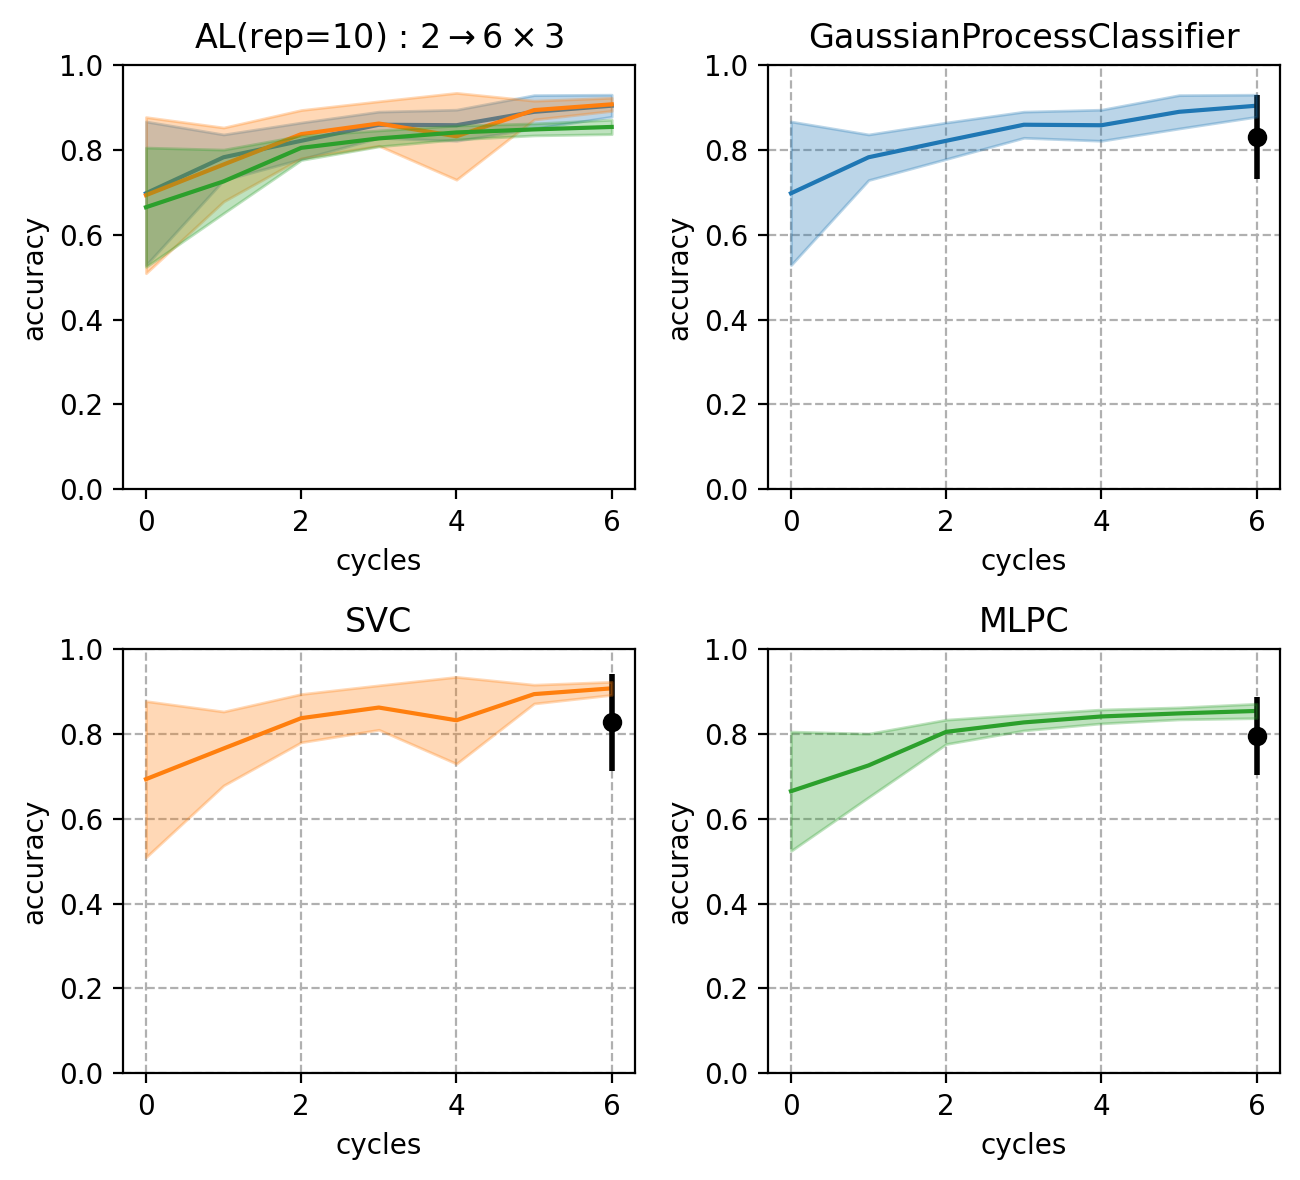

In [19]:
fig, ax = get_axes(4,2)

palette = sns.color_palette('tab10', 3)

for i,(k,arg) in enumerate(accuracy_dict.items()):

    mean_tmp, std_tmp = np.mean(arg, axis=0), np.std(arg, axis=0)
    ax[0].plot(mean_tmp, c=palette[i], zorder=2)
    ax[0].fill_between(np.arange(len(arg[0])), (mean_tmp-std_tmp), (mean_tmp+std_tmp), color=palette[i], alpha=.3, zorder=2)
    ax[0].set_ylim(0.,1.)
    ax[0].set_title(rf'AL(rep={experiments}) : $2 \rightarrow {len(arg[0])-1} \times {n_batch}$')
    ax[0].set_xlabel('cycles')
    ax[0].set_ylabel('accuracy')

    oneshot_mean = np.mean(accuracy_dict[k])
    oneshot_std = np.std(accuracy_dict[k])

    ax[i+1].plot(mean_tmp, c=palette[i], zorder=2)
    ax[i+1].fill_between(np.arange(len(arg[0])), (mean_tmp-std_tmp), (mean_tmp+std_tmp), color=palette[i], alpha=.3, zorder=3)
    ax[i+1].errorbar((len(arg[0])-1), oneshot_mean, yerr=oneshot_std, fmt='ok', elinewidth=2., capsize=0, zorder=2)
    ax[i+1].set_ylim(0.,1.)
    ax[i+1].grid(linestyle='--')
    ax[i+1].set_title(k)
    ax[i+1].set_xlabel('cycles')
    ax[i+1].set_ylabel('accuracy')

fig.tight_layout()


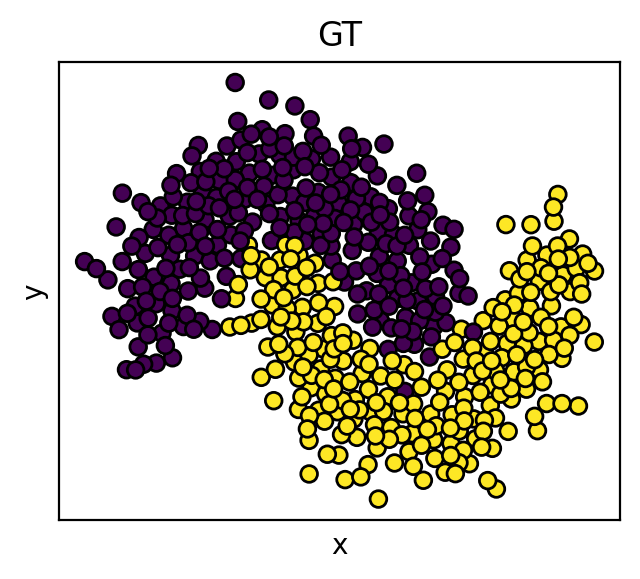

In [20]:
fig, ax = get_axes(1,1)

ax.scatter(X0,X1, c=y, edgecolor='0.')
ax.set_title('GT')
ax.set_xlabel(f0)
ax.set_ylabel(f1)
ax.set_xticks(())
ax.set_yticks(())

fig.tight_layout()